# Fuente

Fuente: 
Students' Academic Performance Dataset (Kaggle)
xAPI-Educational Mining Dataset
https://www.kaggle.com/aljarah/xAPI-Edu-Data

Analisis con Y numérico
https://colab.research.google.com/drive/11tHr6dlYvUDfBBWtsmQpFGYhKwio9ApV#scrollTo=QBTIHOy7UZ4m

Análisis con Y categporico
https://colab.research.google.com/drive/1vXb2TzLe_Ss41Y0mwNW28TPYF0-6hNtz#scrollTo=Ha3oBjdXofxn


# Etiquetas de Datos

**Attributes**
1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not
(nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

# Carga de librerías y carga de datos

In [1]:
import numpy as np #ok
import matplotlib.pyplot as plt#ok
import pandas as pd #ok
from google.colab import files
import keras
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
uploaded = files.upload()

Saving datasets_436_920_xAPI-Edu-Data.csv to datasets_436_920_xAPI-Edu-Data.csv


In [3]:
#print (uploaded['pima-indians-diabetes.csv'][:20].decode('utf-8') + '...')
print (uploaded['datasets_436_920_xAPI-Edu-Data.csv'][:200].decode('utf-8') + '...')

gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenc...


In [4]:
data = pd.read_csv("datasets_436_920_xAPI-Edu-Data.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
print(data)

    gender NationalITy  ... StudentAbsenceDays Class
0        M          KW  ...            Under-7     M
1        M          KW  ...            Under-7     M
2        M          KW  ...            Above-7     L
3        M          KW  ...            Above-7     L
4        M          KW  ...            Above-7     M
..     ...         ...  ...                ...   ...
475      F      Jordan  ...            Above-7     L
476      F      Jordan  ...            Under-7     M
477      F      Jordan  ...            Under-7     M
478      F      Jordan  ...            Above-7     L
479      F      Jordan  ...            Above-7     L

[480 rows x 17 columns]


# Análisis Inicial

In [6]:
# dimensiones del dataframe
data.shape

(480, 17)

In [7]:
#Confirmo que no hay datos nulos en el dataset
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

Las columnas "NationalITy" y "PlaceofBirth" tienen data redundante, podría eliminar una de ellas pero mantendremos ambas para el análisis.

In [8]:
data.head(3)
#data.drop(["PlaceofBirth"], axis = 1, inplace = True)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L


In [9]:
print(data)

    gender NationalITy  ... StudentAbsenceDays Class
0        M          KW  ...            Under-7     M
1        M          KW  ...            Under-7     M
2        M          KW  ...            Above-7     L
3        M          KW  ...            Above-7     L
4        M          KW  ...            Above-7     M
..     ...         ...  ...                ...   ...
475      F      Jordan  ...            Above-7     L
476      F      Jordan  ...            Under-7     M
477      F      Jordan  ...            Under-7     M
478      F      Jordan  ...            Above-7     L
479      F      Jordan  ...            Above-7     L

[480 rows x 17 columns]


In [10]:
data.describe()
# estadísticas de las varibles numéricas

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


# Gráficos:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe888dfef98>]],
      dtype=object)

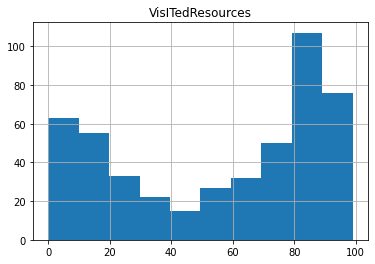

In [11]:
#hist(data['StageID'])
data.hist(column='VisITedResources')
# video https://epnecuador-my.sharepoint.com/personal/henry_paz_epn_edu_ec/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fhenry%5Fpaz%5Fepn%5Fedu%5Fec%2FDocuments%2F2020A%2FIA%20Pregado%2FGrabaci%C3%B3n%20Analisis%20de%20datos%2Emp4&parent=%2Fpersonal%2Fhenry%5Fpaz%5Fepn%5Fedu%5Fec%2FDocuments%2F2020A%2FIA%20Pregado&originalPath=aHR0cHM6Ly9lcG5lY3VhZG9yLW15LnNoYXJlcG9pbnQuY29tLzp2Oi9nL3BlcnNvbmFsL2hlbnJ5X3Bhel9lcG5fZWR1X2VjL0ViMWpzWjdLOTdoT2hobnBwTlJBR2dVQnpaRFJJQzFQdG5tcDI5bXhIamVvMnc_cnRpbWU9WVpkMkhZRVkyRWc


<function matplotlib.pyplot.show>

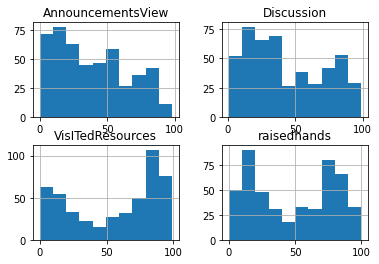

In [12]:
# Histogramas de todo el dataframe
# Salen 4 gráficos porque al momento solo tengo 4 variables numéricas:
data.hist()
plt.show

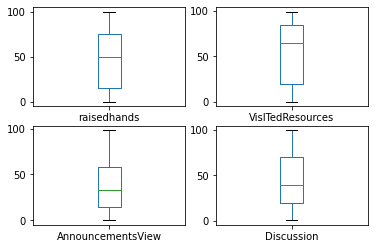

In [116]:
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
# box plot -- distribución de los atributos

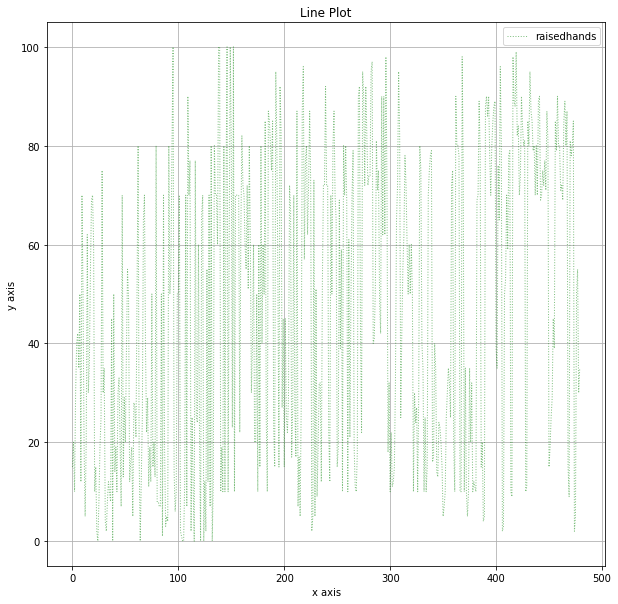

In [13]:
# Line Plot
data.raisedhands.plot(kind="line",color="g",label = 'raisedhands',linewidth=1,alpha = 0.5,grid = True,linestyle = ':',figsize=(10,10))
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.legend(loc="upper right")
plt.title('Line Plot')            # title = title of plot
plt.show()

No handles with labels found to put in legend.


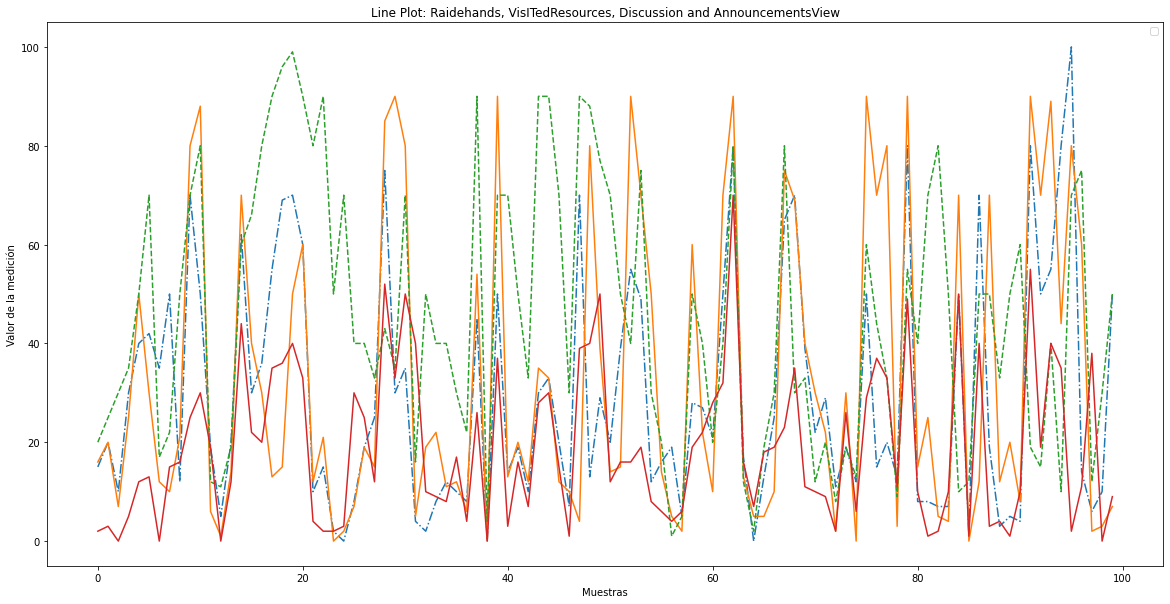

In [14]:
plt.subplots(figsize=(20,10))
plt.plot(data.raisedhands[:100],linestyle="-.")
plt.plot(data.VisITedResources[:100],linestyle="-")
plt.plot(data.Discussion[:100],linestyle="--")
plt.plot(data.AnnouncementsView[:100],linestyle="-")
#imprimo 100 muestras de las 480
plt.xlabel("Muestras")
plt.ylabel("Valor de la medición")
plt.title("Line Plot: Raidehands, VisITedResources, Discussion and AnnouncementsView")
plt.legend(loc="upper right")
plt.show()

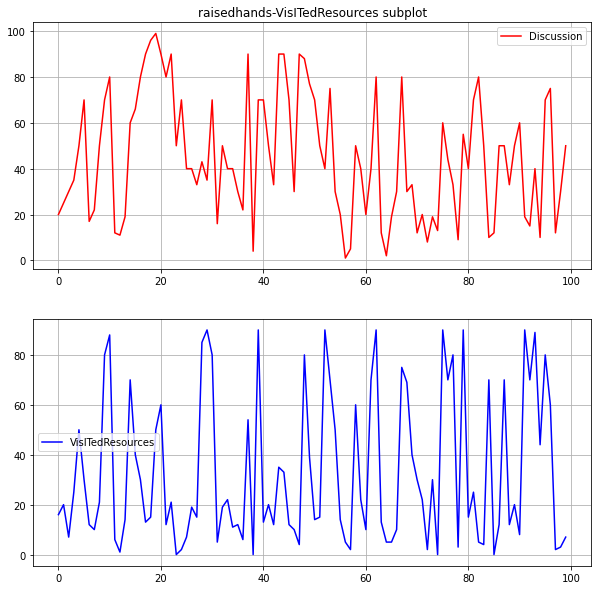

In [15]:
#subplots
raisedhands=data.raisedhands
VisITedResources=data.VisITedResources
Discussion=data.Discussion
AnnouncementsView=data.AnnouncementsView

plt.subplots(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("raisedhands-VisITedResources subplot")
plt.plot(Discussion[:100],color="r",label="Discussion")
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(VisITedResources[:100],color="b",label="VisITedResources")
plt.legend()
plt.grid()

plt.show()

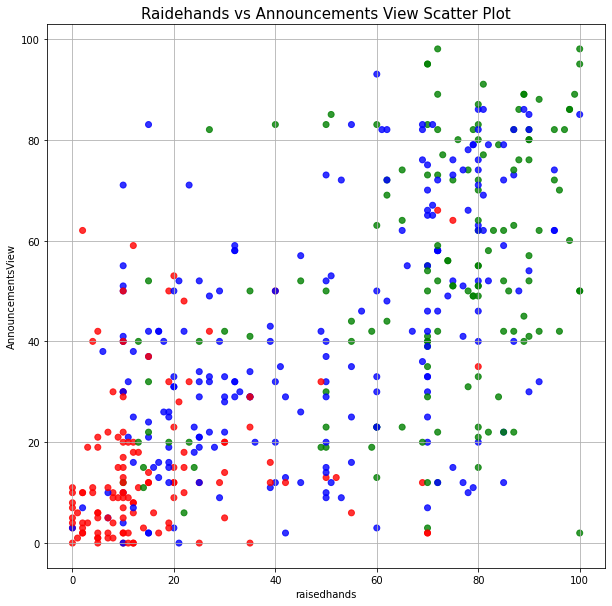

In [16]:
#raidehands vs AnnouncementsView scatter plot
color_list1 = ['red' if i=='L' else 'blue' if i=='M'  else 'green' for i in data.Class]
plt.subplots(figsize=(10,10))
plt.scatter(data.raisedhands,data.AnnouncementsView,color=color_list1, alpha=0.8)
plt.xlabel("raisedhands")
plt.ylabel("AnnouncementsView")
plt.grid()
plt.colormaps
plt.title("Raidehands vs Announcements View Scatter Plot",color="black",fontsize=15)
plt.show()

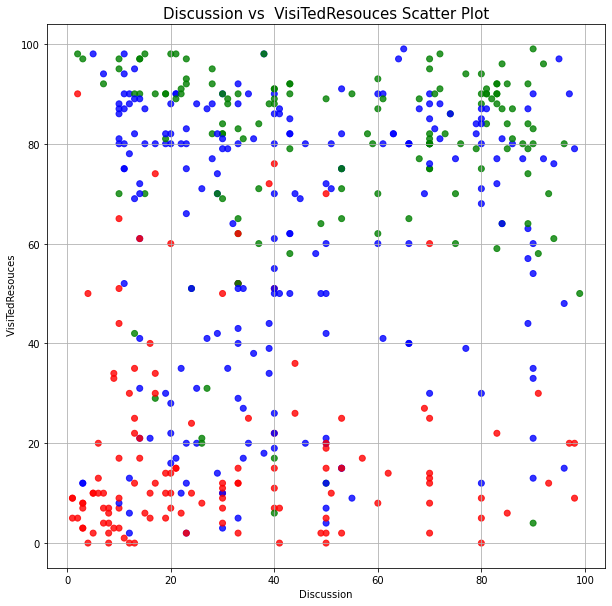

In [17]:
#Discussion vs. VisiTedResouces scatter plot
color_list1 = ['red' if i=='L' else 'blue' if i=='M'  else 'green' for i in data.Class]
plt.subplots(figsize=(10,10))
plt.scatter(data.Discussion,data.VisITedResources,color=color_list1, alpha=0.8)
plt.xlabel("Discussion")
plt.ylabel(" VisiTedResouces")
plt.grid()
plt.colormaps
plt.title("Discussion vs  VisiTedResouces Scatter Plot",color="black",fontsize=15)
plt.show()

In [18]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


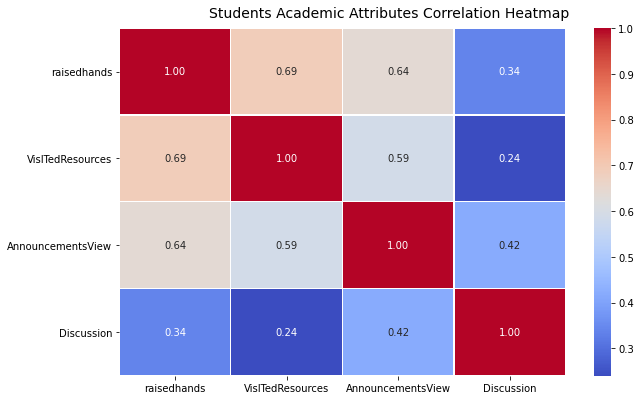

In [19]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Students Academic Attributes Correlation Heatmap', fontsize=14)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


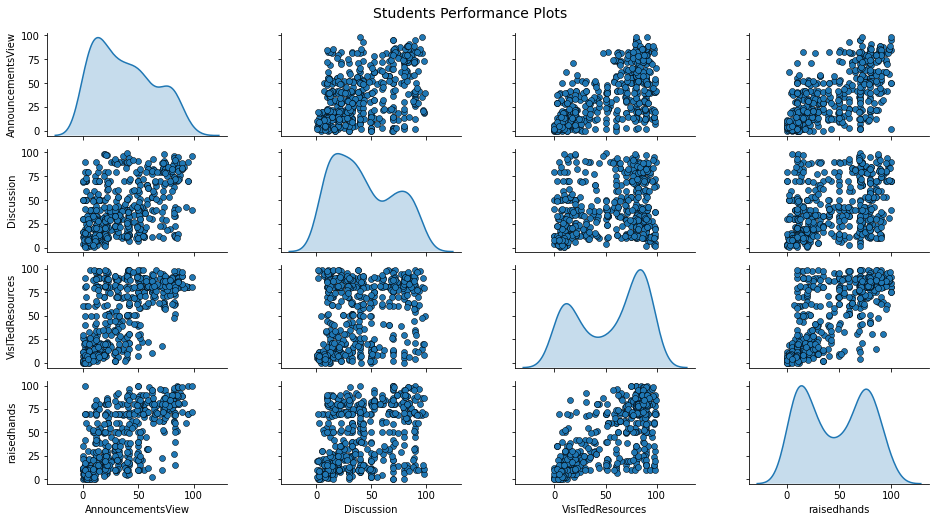

In [20]:
# Pair-wise Scatter Plots
cols = ['AnnouncementsView', 'Discussion', 'VisITedResources', 'raisedhands']
pp = sns.pairplot(data[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Students Performance Plots', fontsize=14)

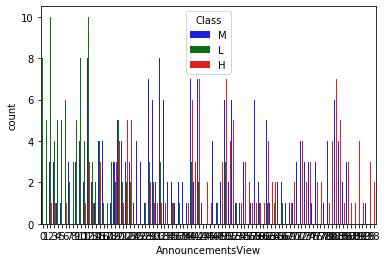

In [21]:
# Multi-bar Plot
cp = sns.countplot(x="AnnouncementsView", hue="Class", data=data, palette= {"green", "red","blue"})

Text(0.5, 0, 'VisITedResources')

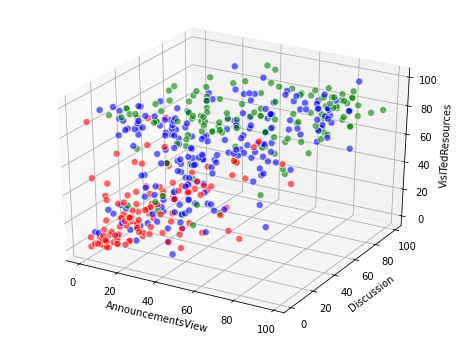

In [22]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
color_list1 = ['red' if i=='L' else 'blue' if i=='M'  else 'green' for i in data.Class]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = data.AnnouncementsView
ys = data.Discussion
zs = data.VisITedResources
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', c=color_list1)

ax.set_xlabel('AnnouncementsView')
ax.set_ylabel('Discussion')
ax.set_zlabel('VisITedResources')

In [ ]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('AnnouncementsView - Discussion - VisITedResources - raisedhands - Class', fontsize=14)

xs = list(data['AnnouncementsView'])
ys = list(data['Discussion'])
zs = list(data['VisITedResources'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(data['raisedhands'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(data['Class'])]

for data5, color, size in zip(data_points, colors, ss):
    x, y, z = data5
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

ax.set_xlabel('AnnouncementsView')
ax.set_ylabel('Discussion')
ax.set_zlabel('VisITedResources')

# Criterios para Clasificación

Los estudiantes son clasificados de acuerdo a su rendimiento, la variable "Class" contiene las etiquetas:


*   H: High (rendimiento alto)
*   M: Medium (rendimiento intermedio)
*   L: Low (rendimiento bajo)





In [25]:
#Para saber si la data está equilibrada -- Class
print(pd.value_counts(data.Class))

M    211
H    142
L    127
Name: Class, dtype: int64


La data no está equilibrada, en la muestra se tiene mayor cantidad de estudiantes de rendimiento intermedio que los de redimiento alto y bajo

In [26]:
#Separar los buenos de los malos
data_malos = data.loc[data['Class'] == 'L']
data_medio = data.loc[data['Class'] == 'M']
data_buenos = data.loc[data['Class'] == 'H']

#Para equilibrar tomo los registros de 127 estudiantes intermedios y buenos, para equilibrar con los de bajo rendimiento
data_medio_subset = data_medio.sample(frac=(127/211), random_state=1)
data_buenos_subset = data_buenos.sample(frac=(127/142), random_state=1)
data_buenos_subset.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
296,F,Jordan,Jordan,lowerlevel,G-04,A,Science,F,Mum,98,87,86,84,No,Good,Under-7,H
404,F,Syria,Syria,MiddleSchool,G-07,A,Biology,F,Mum,96,95,70,70,Yes,Good,Under-7,H
155,M,SaudiArabia,USA,HighSchool,G-11,B,Math,S,Father,70,58,73,91,Yes,Bad,Under-7,H


In [27]:
# se crea un nuevo dataset con los datos tomados como muestra y se confirma que están balanceados
data_equilibrado = pd.concat([data_medio_subset, data_buenos_subset, data_malos])
print(pd.value_counts(data_equilibrado.Class))

H    127
M    127
L    127
Name: Class, dtype: int64


In [28]:
#data_equilibrado.head()
data_equilibrado.shape

(381, 17)

La data está equilibrada, se reducen los registros de 480 a 381.

In [29]:
# comparacion de medias (Cualitativa-cuantitativa)
#Librerias
import scipy.stats as stats
#import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Pruebas Estadísticas

In [30]:
#Librerias
import scipy.stats as stats
#import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [31]:
#Data equilibrada
frecuencia = pd.value_counts(data_equilibrado.Class).to_frame().reset_index()
frecuencia.rename(columns={"index":"Class","Class":"Frecuencia"})

,Class,Frecuencia
0,H,127
1,M,127
2,L,127


ANOVA stands for "Analysis of Variance"

Parametric test assumptions

*   Population distributions are normal
*   Samples have equal variances
*   Independence

La hipótesis nula de la que parten los diferentes tipos de ANOVA es que la media de la variable estudiada es la misma en los diferentes grupos, en contraposición a la hipótesis alternativa de que al menos dos medias difieren de forma significativa. ANOVA permite comparar múltiples medias, pero lo hace mediante el estudio de las varianzas.

https://www.cienciadedatos.net/documentos/19_anova




In [32]:
#raisedhands
stats.f_oneway(data_equilibrado['raisedhands'][data_equilibrado['Class'] == 'H'], 
             data_equilibrado['raisedhands'][data_equilibrado['Class'] == 'M'],
             data_equilibrado['raisedhands'][data_equilibrado['Class'] == 'L'])
    # F_onewayResult(statistic=179.04282786574495, pvalue=1.9792066718502108e-55)
        

F_onewayResult(statistic=179.04282786574495, pvalue=1.9792066718502108e-55)

In [33]:
#VisITedResources
stats.f_oneway(data_equilibrado['VisITedResources'][data_equilibrado['Class'] == 'H'], 
             data_equilibrado['VisITedResources'][data_equilibrado['Class'] == 'M'],
             data_equilibrado['VisITedResources'][data_equilibrado['Class'] == 'L'])
    # F_onewayResult(statistic=254.45438219626152, pvalue=9.92725693461857e-71)

F_onewayResult(statistic=254.45438219626152, pvalue=9.92725693461857e-71)

In [34]:
#AnnouncementsView
stats.f_oneway(data_equilibrado['AnnouncementsView'][data_equilibrado['Class'] == 'H'], 
             data_equilibrado['AnnouncementsView'][data_equilibrado['Class'] == 'M'],
             data_equilibrado['AnnouncementsView'][data_equilibrado['Class'] == 'L'])
    # F_onewayResult(statistic=95.28961265124852, pvalue=3.0935243925396896e-34)

F_onewayResult(statistic=95.28961265124852, pvalue=3.0935243925396896e-34)

In [35]:
#Discussion
stats.f_oneway(data_equilibrado['Discussion'][data_equilibrado['Class'] == 'H'], 
             data_equilibrado['Discussion'][data_equilibrado['Class'] == 'M'],
             data_equilibrado['Discussion'][data_equilibrado['Class'] == 'L'])
    # F_onewayResult(statistic=25.938193620669903, pvalue=2.779787493374603e-11)

F_onewayResult(statistic=25.938193620669903, pvalue=2.779787493374603e-11)

De los resultados obtenidos, ninguna de estas variables debería ser tomada en cuenta

In [36]:
data_equilibrado.hist

<bound method hist_frame of     gender NationalITy  ... StudentAbsenceDays Class
109      M          KW  ...            Under-7     M
438      M      Jordan  ...            Under-7     M
123      F     lebanon  ...            Under-7     M
454      F      Jordan  ...            Under-7     M
77       M          KW  ...            Under-7     M
..     ...         ...  ...                ...   ...
469      F      Jordan  ...            Above-7     L
474      F      Jordan  ...            Above-7     L
475      F      Jordan  ...            Above-7     L
478      F      Jordan  ...            Above-7     L
479      F      Jordan  ...            Above-7     L

[381 rows x 17 columns]>

In [37]:
data_equilibrado.drop(columns=['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'])

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
109,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,No,Bad,Under-7,M
438,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,Yes,Good,Under-7,M
123,F,lebanon,lebanon,lowerlevel,G-02,B,IT,F,Father,Yes,Good,Under-7,M
454,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,Yes,Good,Under-7,M
77,M,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,Yes,Good,Under-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,No,Bad,Above-7,L
474,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Father,No,Bad,Above-7,L
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,No,Bad,Above-7,L
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,No,Bad,Above-7,L


In [38]:
data_equilibrado = data_equilibrado.drop(columns=['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'])

In [39]:
data_equilibrado.shape

(381, 13)

# Cambio de variables categóricas a numéricas

In [40]:
#Variable 'gender'

data_new = pd.get_dummies(data_equilibrado,columns=["gender"],drop_first=False)
data_new.head(3)


,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,gender_F,gender_M
109,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,No,Bad,Under-7,M,0,1
438,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,Yes,Good,Under-7,M,0,1
123,lebanon,lebanon,lowerlevel,G-02,B,IT,F,Father,Yes,Good,Under-7,M,1,0


In [41]:
#Variable 'NationalITy'

data_new1 = pd.get_dummies(data_new,columns=["NationalITy"],drop_first=False)
data_new1.shape

(381, 27)

In [42]:
#Variable 'PlaceofBirth'

data_new2 = pd.get_dummies(data_new1,columns=["PlaceofBirth"],drop_first=False)
data_new2.shape

(381, 40)

In [43]:
#Variable 'StageID'

data_new3 = pd.get_dummies(data_new2,columns=["StageID"],drop_first=False)
data_new3.shape

(381, 42)

In [44]:
#Variable 'GradeID'
#print(pd.value_counts(data_new.GradeID))

data_new4 = pd.get_dummies(data_new3,columns=["GradeID"],drop_first=False)
data_new4.shape

(381, 51)

In [45]:
#Variable 'SectionID'
#SectionID: A, B o C

data_new5 = pd.get_dummies(data_new4,columns=["SectionID"],drop_first=False)
data_new5.shape

(381, 53)

In [46]:
#Variable 'Topic'
#print(pd.value_counts(data_new6.Topic))

data_new6 = pd.get_dummies(data_new5,columns=["Topic"],drop_first=False)
data_new6.shape

(381, 64)

In [47]:
#Variable 'Semester'

data_new7 = pd.get_dummies(data_new6,columns=["Semester"],drop_first=False)
data_new7.shape

(381, 65)

In [48]:
#Variable 'Relation'

data_new8 = pd.get_dummies(data_new7,columns=["Relation"],drop_first=False)
data_new8.shape

(381, 66)

In [49]:
#Variable 'ParentAnsweringSurvey'

data_new9 = pd.get_dummies(data_new8,columns=["ParentAnsweringSurvey"],drop_first=False)
data_new9.shape

(381, 67)

In [50]:
#Variable 'ParentschoolSatisfaction'

data_new10 = pd.get_dummies(data_new9,columns=["ParentschoolSatisfaction"],drop_first=False)
data_new10.shape

(381, 68)

In [51]:
data_new10.head(3)

,StudentAbsenceDays,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,PlaceofBirth_Egypt,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,PlaceofBirth_Morocco,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-02,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_A,SectionID_B,SectionID_C,Topic_Arabic,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good
109,Under-7,M,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
438,Under-7,M,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
123,Under-7,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1


In [52]:
#print(pd.value_counts(data_equilibrado.Relation))
#print(pd.value_counts(data_new.Relation_Mum))

In [53]:
#Variable 'StudentAbsenceDays'

print(pd.value_counts(data_new10.StudentAbsenceDays))
data_new10.StudentAbsenceDays = data_new10.StudentAbsenceDays.replace({"Under-7": "UnderSeven", "Above-7": "AboveSeven"})
print(pd.value_counts(data_new10.StudentAbsenceDays))

# con esto solucioné el error que me causa el -7 al tratar de crear la nueva variable

Under-7    222
Above-7    159
Name: StudentAbsenceDays, dtype: int64
UnderSeven    222
AboveSeven    159
Name: StudentAbsenceDays, dtype: int64


In [54]:
data_new10.head(3)

,StudentAbsenceDays,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,PlaceofBirth_Egypt,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,PlaceofBirth_Morocco,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-02,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_A,SectionID_B,SectionID_C,Topic_Arabic,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good
109,UnderSeven,M,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
438,UnderSeven,M,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
123,UnderSeven,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1


In [55]:
#Variable 'StudentAbsenceDays_UnderSeven':
data_new11 = pd.get_dummies(data_new10,columns=["StudentAbsenceDays"],drop_first=False)
#print(pd.value_counts(data_new11.StudentAbsenceDays_UnderSeven))
#data_new11.head()
data_new11.shape

(381, 69)

Cambiar el nombre de las variables

In [ ]:
#data_new10.rename(columns={"ParentschoolSatisfaction_Good": "PadresConformes", "ParentAnsweringSurvey_Yes": "PadresResponden"})
#data_new10.head(3)

Veo los nombres de las cabeceras para luego ordenar

In [56]:
#data_new1.hist()
#plt.show
print(data_new11.columns.tolist())

['Class', 'gender_F', 'gender_M', 'NationalITy_Egypt', 'NationalITy_Iran', 'NationalITy_Iraq', 'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia', 'NationalITy_Morocco', 'NationalITy_Palestine', 'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis', 'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela', 'PlaceofBirth_Egypt', 'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan', 'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco', 'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia', 'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA', 'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'StageID_HighSchool', 'StageID_MiddleSchool', 'StageID_lowerlevel', 'GradeID_G-02', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06', 'GradeID_G-07', 'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10', 'GradeID_G-11', 'GradeID_G-12', 'SectionID_A', 'SectionID_B', 'SectionID_C', 'Topic_Arabic', 'Topic_Biology', 'Topic_Chemistry', 'Topic_Englis

In [57]:
#ordeno las cabeceras 
column_names = ['gender_F', 'gender_M', 'NationalITy_Egypt', 'NationalITy_Iran', 'NationalITy_Iraq', 'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia', 'NationalITy_Morocco', 'NationalITy_Palestine', 'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis', 'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela', 'PlaceofBirth_Egypt', 'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan', 'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco', 'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia', 'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA', 'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'StageID_HighSchool', 'StageID_MiddleSchool', 'StageID_lowerlevel', 'GradeID_G-02', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06', 'GradeID_G-07', 'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10', 'GradeID_G-11', 'GradeID_G-12', 'SectionID_A', 'SectionID_B', 'SectionID_C', 'Topic_Arabic', 'Topic_Biology', 'Topic_Chemistry', 'Topic_English', 'Topic_French', 'Topic_Geology', 'Topic_History', 'Topic_IT', 'Topic_Math', 'Topic_Quran', 'Topic_Science', 'Topic_Spanish', 'Semester_F', 'Semester_S', 'Relation_Father', 'Relation_Mum', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',  'ParentAnsweringSurvey_No', 'ParentAnsweringSurvey_Yes', 'ParentschoolSatisfaction_Bad', 'ParentschoolSatisfaction_Good', 'StudentAbsenceDays_AboveSeven', 'StudentAbsenceDays_UnderSeven', 'Class']
data_new12 = data_new11.reindex(columns=column_names)
data_new12.head(2)

,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,PlaceofBirth_Egypt,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,PlaceofBirth_Morocco,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-02,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_A,SectionID_B,SectionID_C,Topic_Arabic,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_F,Semester_S,Relation_Father,Relation_Mum,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_AboveSeven,StudentAbsenceDays_UnderSeven,Class
109,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,NaN,NaN,NaN,NaN,1,0,1,0,0,1,M
438,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,NaN,NaN,NaN,0,1,0,1,0,1,M


Lo mismo con la variable objetivo "Class"

In [58]:
#Variable 'Class':
data_new13 = pd.get_dummies(data_new11,columns=["Class"],drop_first=False)
#data_new13.head()
data_new13.shape

(381, 71)

In [59]:
data_new13.head()

,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,PlaceofBirth_Egypt,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,PlaceofBirth_Morocco,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-02,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_A,SectionID_B,SectionID_C,Topic_Arabic,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_AboveSeven,StudentAbsenceDays_UnderSeven,Class_H,Class_L,Class_M
109,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1
438,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1
123,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
454,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
77,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1


In [60]:
data_limpia = data_new13
data_limpia_c = data_new12

In [ ]:
# para descargar el csv
# data_limpia.to_csv('data_limpia.csv')
# files.download("data_limpia.csv")

# Split

In [61]:
data_limpia.shape
# (381, 71)
data_limpia_c.shape
# (381, 73)


(381, 73)

In [62]:
#pd.value_counts(data_limpia.Class_M)
#pd.value_counts(data_limpia.Class_L) *** la misma cantidad porque estaba equilibrada
pd.value_counts(data_limpia.StudentAbsenceDays_AboveSeven)

0    222
1    159
Name: StudentAbsenceDays_AboveSeven, dtype: int64

In [63]:
print(data_limpia.head(3))

     gender_F  gender_M  NationalITy_Egypt  ...  Class_H  Class_L  Class_M
109         0         1                  0  ...        0        0        1
438         0         1                  0  ...        0        0        1
123         1         0                  0  ...        0        0        1

[3 rows x 71 columns]


In [64]:
#X=data_limpia.iloc[:,0:72].values
x=data_limpia.loc[:, 'gender_F':'StudentAbsenceDays_UnderSeven'].values
y=data_limpia.loc[:, 'Class_H':'Class_M'].values
y2=data_limpia_c.loc[:, 'Class':'Class'].values
#Y las 3 últimas columnas, variable Class
#print(X.shape)
print(y)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [66]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(266, 68)
(266, 3)
(115, 68)
(115, 3)


# Red Neuronal

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=1)
model = Sequential()
model.add(Dense(8, input_dim=68, init= "uniform" , activation= "relu")) # tanh, sigmoid, relu, tan, normal
model.add(Dense(6, init= "uniform" , activation= "relu" )) 
model.add(Dense(3, init= "uniform" , activation= "sigmoid" ))
# Compile model 
model.compile(loss= "binary_crossentropy" , optimizer= "adam" , metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=300, batch_size=50, verbose=0)
model.evaluate(X_train,Y_train)
scores = model.evaluate(X_train, Y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
#cvscores.append(scores[1] * 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=68, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="uniform")`
  """


266/266 [==============================] - 0s 103us/step
accuracy: 87.59%


In [68]:
model.evaluate(X_test,Y_test)
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 


115/115 [==============================] - 0s 40us/step
accuracy: 83.19%


# Red neuronal (Y Categórico)

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y2, test_size=0.30, random_state=1)
model = Sequential()
model.add(Dense(8, input_dim=68, init= "uniform" , activation= "relu")) # tanh, sigmoid, relu, tan, normal
model.add(Dense(6, init= "uniform" , activation= "relu" )) 
model.add(Dense(1, init= "uniform" , activation= "sigmoid" ))
# Compile model 
model.compile(loss= "binary_crossentropy" , optimizer= "adam" , metrics=["accuracy"])
model.fit(X_train, Y_train(), epochs=300, batch_size=50, verbose=0)
model.evaluate(X_train,Y_train)
scores = model.evaluate(X_train, Y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
# ValueError: could not convert string to float: 'M'
# problema con el data type

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=68, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


TypeError: ignored

# Modelo Regresión Logística

In [70]:
from sklearn.linear_model import LogisticRegression

https://github.com/henrypaz/ANN-y-Series-Temporales/blob/master/Proyecto_ML.ipynb

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=1)
print(X_train.shape)
print(Y_train.shape)

(266, 68)
(266, 3)


In [ ]:
np.ravel(Y_train)

In [73]:
#Regresion Logistica
rl = LogisticRegression(penalty='l2',solver='sag',max_iter=500,random_state=1)

rl.fit(X_train,Y_train)
#ajustar los datos

score_rl = rl.score(X_train, Y_train.ravel())
#valor del score 
print('Precisión: {:.2f}'.format(score_rl))

ValueError: ignored

In [74]:
# Matriz de Confusión
from sklearn.metrics import confusion_matrix
Y_predLog = rl.predict(X_train)
regresion_logistica_confusion_matrix_train = confusion_matrix(Y_train, Y_predLog)
print('Regresion Logistica: Matriz de confusion (Train)')
print(regresion_logistica_confusion_matrix_train)

NotFittedError: ignored

In [ ]:
# Reporte de Clasificación (Train)
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_predLog))

In [ ]:
#Validacion
#valor del score 
print('Precisión: {:.2f}'.format(rl.score(X_test, Y_test)))

In [ ]:
#matriz de confusión (test)

from sklearn.metrics import confusion_matrix
Y_predLogT = rl.predict(X_test)
regresion_logistica_confusion_matrix_validate = confusion_matrix(Y_test, Y_predLogT)
print('Regresion Logistica: Matriz de confusion (Test)')
print(regresion_logistica_confusion_matrix_validate)

In [ ]:
# Reporte de Clasificación (Test)
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predLogT))

Matriz de Confusión

# Modelo Regresión Logística (Y Categórico)

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y2, test_size=0.30, random_state=1)
print(X_train.shape)
print(Y_train.shape)

(266, 68)
(266, 1)


In [76]:
#np.ravel(Y_train)
# soluciono wl warning: A column-vector y was passed when a 1d array was expected.

In [77]:
#Regresion Logistica
rl = LogisticRegression(penalty='l2',solver='sag',max_iter=500,random_state=1)

rl.fit(X_train,Y_train.ravel())
#ajustar los datos

score_rl = rl.score(X_train, Y_train.ravel())
#valor del score 
print('Precisión: {:.2f}'.format(score_rl))

Precisión: 0.82


In [78]:
# Matriz de Confusión
from sklearn.metrics import confusion_matrix
Y_predLog = rl.predict(X_train)
regresion_logistica_confusion_matrix_train = confusion_matrix(Y_train, Y_predLog)
print('Regresion Logistica: Matriz de confusion (Train)')
print(regresion_logistica_confusion_matrix_train)

Regresion Logistica: Matriz de confusion (Train)
[[81  3  8]
 [ 1 76  7]
 [19  9 62]]


In [79]:
# Reporte de Clasificación (Train)
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_predLog))

              precision    recall  f1-score   support

           H       0.80      0.88      0.84        92
           L       0.86      0.90      0.88        84
           M       0.81      0.69      0.74        90

    accuracy                           0.82       266
   macro avg       0.82      0.82      0.82       266
weighted avg       0.82      0.82      0.82       266



In [80]:
#Validacion
#valor del score 
print('Precisión: {:.2f}'.format(rl.score(X_test, Y_test)))

Precisión: 0.74


In [81]:
#matriz de confusión (test)

from sklearn.metrics import confusion_matrix
Y_predLogT = rl.predict(X_test)
regresion_logistica_confusion_matrix_validate = confusion_matrix(Y_test, Y_predLogT)
print('Regresion Logistica: Matriz de confusion (Test)')
print(regresion_logistica_confusion_matrix_validate)

Regresion Logistica: Matriz de confusion (Test)
[[22  0 13]
 [ 0 40  3]
 [ 7  7 23]]


In [82]:
# Reporte de Clasificación (Test)
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predLogT))

              precision    recall  f1-score   support

           H       0.76      0.63      0.69        35
           L       0.85      0.93      0.89        43
           M       0.59      0.62      0.61        37

    accuracy                           0.74       115
   macro avg       0.73      0.73      0.73       115
weighted avg       0.74      0.74      0.74       115



# KNN
https://github.com/henrypaz/ANN-y-Series-Temporales/blob/master/Proyecto_ML2.ipynb

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=1)
n_k = 5
# con 6 tengo overfitting
# con 6 ACC train:  0.7330827067669173
# con 6 ACC test:  0.7739130434782608
knn=KNeighborsClassifier(n_k)
knn.fit(X_train, Y_train)
score=knn.score(X_train, Y_train)
print('ACC train: ', score)

scoreTest= knn.score(X_test, Y_test)
print('ACC test: ', scoreTest)

predict_knn=knn.predict(X_test)


ACC train:  0.7330827067669173
ACC test:  0.7130434782608696


In [ ]:
print(confusion_matrix(Y_test, predict_knn))
#print(confusion_matrix(Y_test, predict_knn))
#print(classification_report(Y_test, predict_knn))

# KNN (Y categórica)

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y2, test_size=0.30, random_state=1)
n_k = 5
# con 6 tengo overfitting
# con 6 ACC train:  0.7330827067669173
# con 6 ACC test:  0.7739130434782608
knn=KNeighborsClassifier(n_k)
knn.fit(X_train, Y_train.ravel())
score=knn.score(X_train, Y_train.ravel())
print('ACC train: ', score)
scoreTest= knn.score(X_test, Y_test)
print('ACC test: ', scoreTest)

predict_knn=knn.predict(X_test)

ACC train:  0.7518796992481203
ACC test:  0.7391304347826086


In [87]:
print(confusion_matrix(Y_test, predict_knn))

[[29  1  5]
 [ 3 39  1]
 [10 10 17]]


In [88]:
print(classification_report(Y_test, predict_knn))

              precision    recall  f1-score   support

           H       0.69      0.83      0.75        35
           L       0.78      0.91      0.84        43
           M       0.74      0.46      0.57        37

    accuracy                           0.74       115
   macro avg       0.74      0.73      0.72       115
weighted avg       0.74      0.74      0.73       115



<Figure size 3600x3600 with 0 Axes>

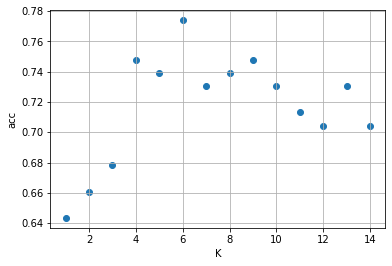

In [89]:
k_range = range(1,15) # para revisar el mejor k(1-100)
scores=[]

for k in k_range:
    knn= knn = KNeighborsClassifier (n_neighbors=k)
    knn.fit(X_train, Y_train.ravel())
    scores.append(knn.score(X_test, Y_test))

plt.figure(figsize=(50,50))
plt.figure()
plt.xlabel('K')
plt.ylabel('acc')
plt.scatter(k_range, scores)
plt.grid()
plt.show()

# Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn
# https://inteligencia-analitica.com/arboles-decision-python/

In [ ]:
# Parámetros del árbol de decisiones
# https://vincentblog.xyz/posts/decision-trees-in-python

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=1)
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
validation_prediction = tree.predict(X_test)
training_prediction = tree.predict(X_train)
print('Accuracy training set: ', accuracy_score(y_true=Y_train, y_pred=training_prediction))
print('Accuracy validation set: ', accuracy_score(y_true=Y_test, y_pred=validation_prediction))

Accuracy training set:  0.9323308270676691
Accuracy validation set:  0.7478260869565218


In [115]:
sklearn.metrics.confusion_matrix(Y_test,validation_prediction)
#sklearn.metrics.accuracy_score(Y_test,validation_prediction)

array([[27,  0,  8],
       [ 0, 38,  5],
       [ 5, 10, 22]])

# Decision Tree (Y Categórico)

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y2, test_size=0.30, random_state=1)
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
validation_prediction = tree.predict(X_test)
training_prediction = tree.predict(X_train)
print('Accuracy training set: ', accuracy_score(y_true=Y_train, y_pred=training_prediction))
print('Accuracy validation set: ', accuracy_score(y_true=Y_test, y_pred=validation_prediction))

Accuracy training set:  0.9624060150375939
Accuracy validation set:  0.7565217391304347


# SVM

In [94]:
from sklearn.svm import SVC

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=1)

# SVM Poly

svm_classifier = SVC(kernel='poly', degree=4)
svm_classifier.fit(X_train, Y_train)
predict_svm = svm_classifier.predict(X_test)
print(confusion_matrix(Y_test, predict_svm))
print(classification_report(Y_test, predict_svm))

ValueError: ignored

# SVM (Y Categórico)

In [96]:
from sklearn.svm import SVC

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y2, test_size=0.30, random_state=1)

# SVM Linear
# https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, Y_train.ravel())
predict_svm = svm_classifier.predict(X_test)
print(confusion_matrix(Y_test, predict_svm))
print(classification_report(Y_test, predict_svm))

[[26  0  9]
 [ 0 39  4]
 [ 8  7 22]]
              precision    recall  f1-score   support

           H       0.76      0.74      0.75        35
           L       0.85      0.91      0.88        43
           M       0.63      0.59      0.61        37

    accuracy                           0.76       115
   macro avg       0.75      0.75      0.75       115
weighted avg       0.75      0.76      0.75       115



In [98]:
# SVM Poly

svm_classifier = SVC(kernel='poly', degree=4)
svm_classifier.fit(X_train, Y_train.ravel())

# A column-vector y was passed when a 1d array was expected. --> .ravel()

predict_svm = svm_classifier.predict(X_test)
print(confusion_matrix(Y_test, predict_svm))
print(classification_report(Y_test, predict_svm))

[[28  0  7]
 [ 0 40  3]
 [ 3  8 26]]
              precision    recall  f1-score   support

           H       0.90      0.80      0.85        35
           L       0.83      0.93      0.88        43
           M       0.72      0.70      0.71        37

    accuracy                           0.82       115
   macro avg       0.82      0.81      0.81       115
weighted avg       0.82      0.82      0.82       115



In [99]:
# RBG (Gaussian Kernell)

svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train, Y_train.ravel())
predict_svm = svm_classifier.predict(X_test)
print(confusion_matrix(Y_test, predict_svm))
print(classification_report(Y_test, predict_svm))

[[27  0  8]
 [ 0 40  3]
 [ 8  6 23]]
              precision    recall  f1-score   support

           H       0.77      0.77      0.77        35
           L       0.87      0.93      0.90        43
           M       0.68      0.62      0.65        37

    accuracy                           0.78       115
   macro avg       0.77      0.77      0.77       115
weighted avg       0.78      0.78      0.78       115



# Resumen

La ​​clasificación es una técnica para determinar la clase a la que pertenece el dependiente según una o más variables independientes. En Aprendizaje supervisado, los algoritmos aprenden de la etiqueta datos. Después de comprender los datos, el algoritmo determina qué etiqueta debe asignarse a los nuevos datos según el patrón y asociando los patrones a los nuevos datos sin etiquetar.

---
    Modelo                  Acc Train      Acc Test

    Red Neuronal               87.59%        83.19% *** Mejor opción ***
    Regresión Logística (C)    82.00%        74.00% Overfitting
    KNN                        73.31%        71.30%
    KNN (C)                    75.19%        73.91%
    Decision Tree              93.23%        74.78% Overfitting
    Decision Tree (C)          96.24%        75.65% Overfitting
    SVM Linear (C)             81.00%        76.00%
    SVM Poly (C)               94.00%        82.00% Overfitting
    SVM RBG (C)                83.00%        78.00%

---
Debido al mejor overfitting y mayor precisión, se considera que la red neuronal es el modelo que mejor se ajusta para la clasificación del desempeño académico de los estudiantes.

# Conclusiones

En el análisis supervisado, algunos de los algoritmos pueden aprender de la etiqueta de la data directamente con una variable categórica (KNN, Decision Tree), mientras otros modelos exigen que la variable objetivo sea numérica (NN).

La principal ventaja de los modelos de clasificación no-paramétrico (no parten de una función de distribución o clasificación conocida), es que pueden aprender cualquier cosa. Ejemplo de esto, el árbol de clasificación.

En este caso se confirma el problema común de "overfitting" en el modelo de árbol de decisión, en futuras oportunidades esto se podría controlar no usando los parámetros por default.

Para este análisis KNN es el modelo de menor precisión, el desempeño de este algoritmo mejora con una cantidad pequeña de entradas, tiene problemas cuando la cantidad de entradas es muy grande.
